In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
data=pd.read_csv('E:\\DS ASSIGNMENTS\\5.Multi linear regression\\50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MKS'},axis=1)
data1

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data1.head()

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data1.tail()

,RDS,ADM,MKS,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADM     50 non-null     float64
 2   MKS     50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data1.describe()

,RDS,ADM,MKS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
data1.isna().sum()

RDS       0
ADM       0
MKS       0
State     0
Profit    0
dtype: int64

In [10]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


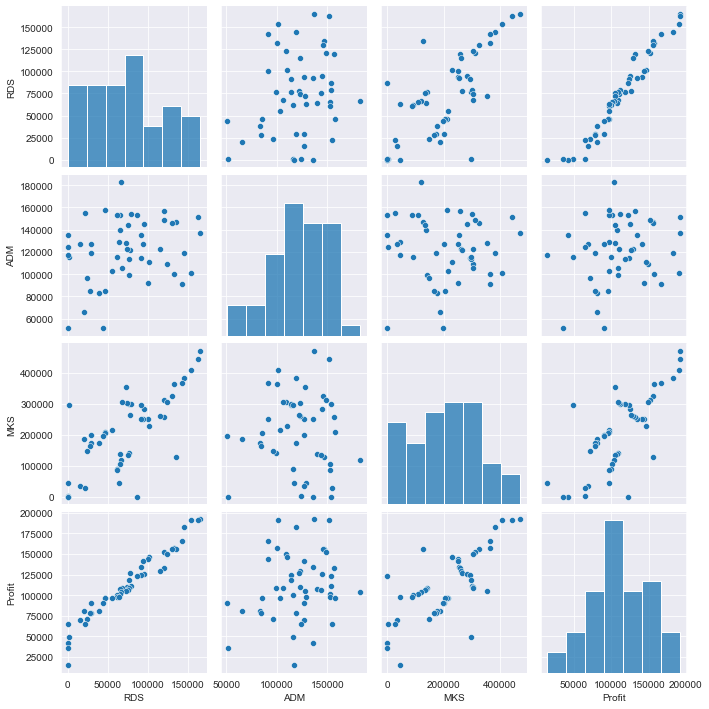

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)
plt.show()

In [12]:
x1=data1['RDS']
x2=data1['ADM']
x3=data1['MKS']
y=data1['Profit']

In [13]:
variable={'No Transformation':{'x1':x1,'x2':x2,'x3':x3,'y':y},
         'Square_Root_x_y':{'x1':np.sqrt(x1),'x2':np.sqrt(x2),'x3':np.sqrt(x3),'y':np.sqrt(y)},
         'Square_Root_Trans_x':{'x1':np.sqrt(x1),'x2':np.sqrt(x2),'x3':np.sqrt(x3),'y':y},
         'Square_Root_Trans_y':{'x1':x1,'x2':x2,'x3':x3,'y':np.sqrt(y)}}

In [14]:
r_square=[]
r_square_adj=[]
MSE=[]
for key,val in variable.items():
    print('\033[1m' + '\033[4m' + key,":" + '\033[0m',"\n\n")
    x1=val['x1']
    x2=val['x2']
    x3=val['x3']
    y=val['y']
    
    model1=smf.ols('y~x1+x2+x3',data=data1).fit()
    print(model1.summary(),'\n\n')
    
    r_square.append(model1.rsquared)
    r_square_adj.append(model1.rsquared_adj)
    MSE.append(model1.mse_model)

No Transformation : 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        01:20:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.

In [15]:
Models = variable.keys()
joined = list(zip(Models, r_square, r_square_adj, MSE))
Results = pd.DataFrame(joined, columns=['Models', 'R-Square', 'Adjusted R-Square','MSE'])
Results

,Models,R-Square,Adjusted R-Square,MSE
0,No Transformation,0.950746,0.947534,2.522799e+10
1,Square_Root_x_y,0.930544,0.926014,6.397615e+04
2,Square_Root_Trans_x,0.907957,0.901954,2.409259e+10
3,Square_Root_Trans_y,0.895397,0.888575,6.155979e+04


In [16]:
best = pd.DataFrame(variable.get("No Transformation"))
model_best = smf.ols("y~x1+x2+x3", data=best).fit()
print('\033[1m' + '\033[4m' + "No Transformation:" + '\033[0m',"\n\n")
print(model_best.summary())

No Transformation: 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        01:21:12   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.3

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = best[['x1','x2', 'x3']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
0,8.384571,x1
2,7.593984,x3
1,4.026406,x2


Here all the values of VIF <20 , so there is no problem of collinearity

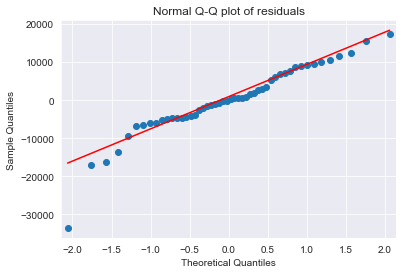

In [18]:
sm.qqplot(model_best.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model_best.resid>40))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual Plot of Homoscedasticity

In [20]:
model_best = smf.ols("y~x1+x2+x3", data=best).fit()

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

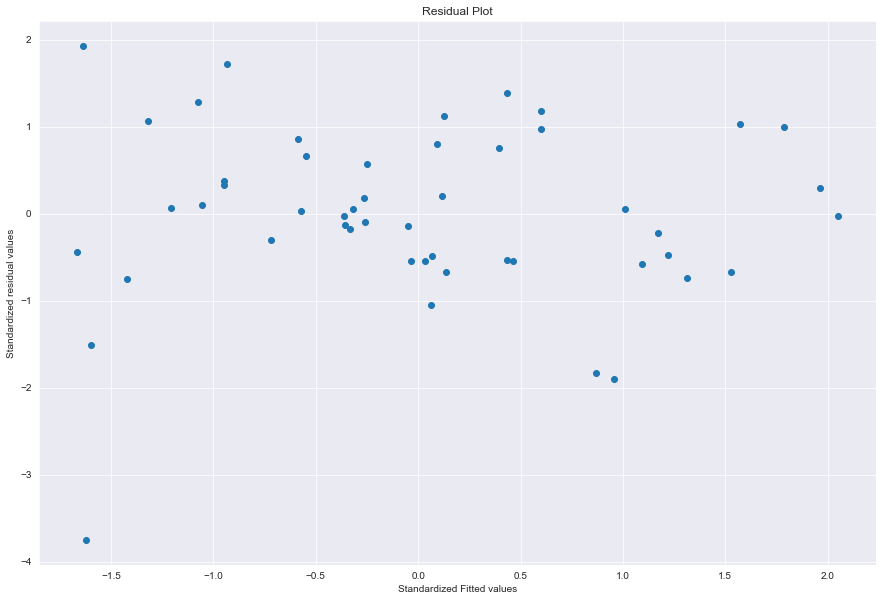

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model_best.fittedvalues),
            get_standardized_values(model_best.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


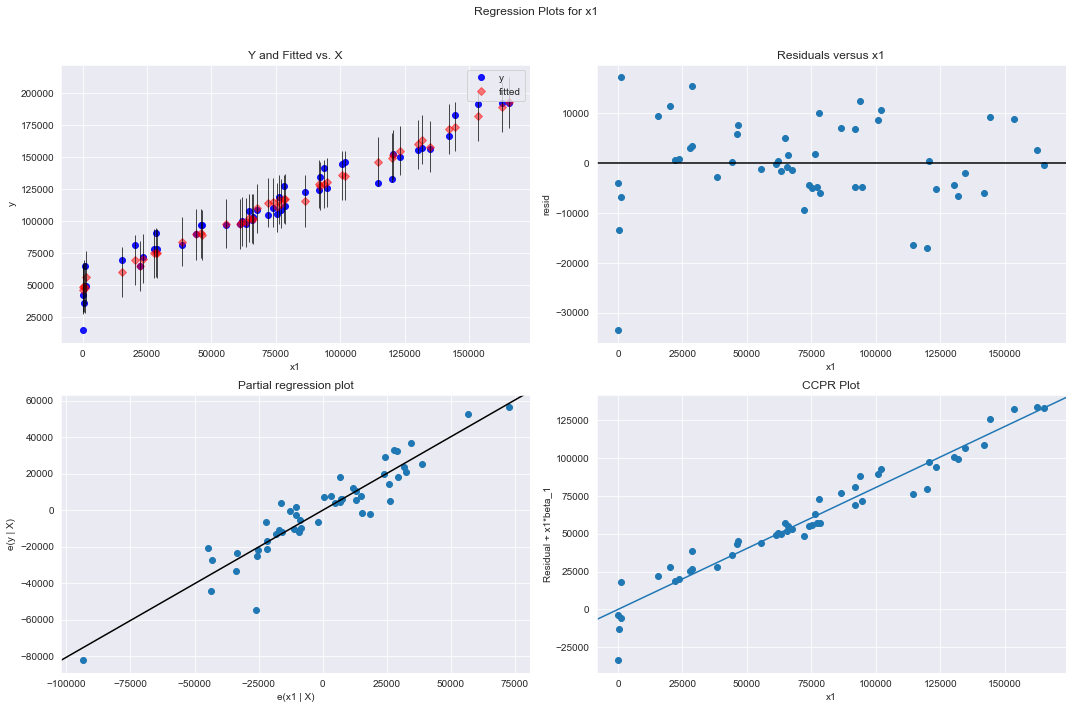

In [23]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_best, 'x1', fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers 

Cook's Distance

In [24]:
model_influence = model_best.get_influence()
(c, _) = model_influence.cooks_distance

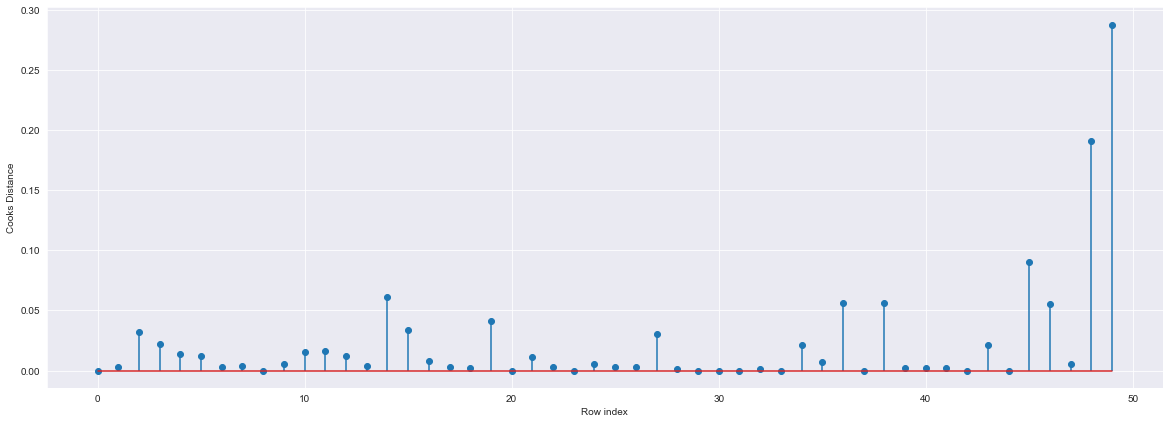

In [25]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(best)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# High Influence Points

In [27]:
best.shape

(50, 4)

In [28]:
k = best.shape[1]
n = best.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

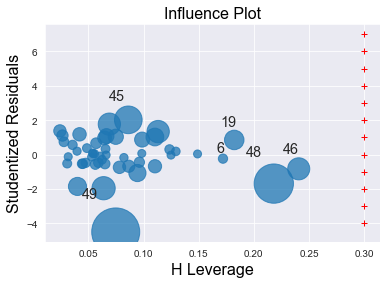

In [29]:
influence_plot(model_best,alhpa=0.5)

y=[i for i in range(-4,8)]
x=[leverage_cutoff for i in range(12)]
plt.plot(x,y,'r+')

plt.show()

In [30]:
best[best.index.isin([46,48,19])]

,x1,x2,x3,y
19,86419.70,153514.11,0.00,122776.86
46,1315.46,115816.21,297114.46,49490.75
48,542.05,51743.15,0.00,35673.41


In [31]:
best.head()

,x1,x2,x3,y
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Improving the model

In [32]:
data2=data1.drop(data1.index[[46,48,19]],axis=0).reset_index()

In [33]:
data2=data2.drop(['index'],axis=1)

In [34]:
data2.head()

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
